In [1]:
import os
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import cv2

from tqdm import tqdm
from featureextraction import loadFeatures

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.utils import shuffle

print(cv2.__version__)

3.4.1


In [2]:
TRAINDATAPATH = "dataset"
TESTDATAPATH = "testdata"
seed = 7
scoring = "accuracy"

X, Y, X_TEST, Y_TEST = [], [], [], []

In [3]:
loadFeatures(X, Y, TRAINDATAPATH)
loadFeatures(X_TEST, Y_TEST, TESTDATAPATH)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:25<00:00, 398.14it/s]


In [52]:
X1, Y1 = list(X), list(Y)
X1_TEST, Y1_TEST = list(X_TEST), list(Y_TEST)

In [53]:
X1, Y1 = shuffle(X1, Y1, random_state=0)
X1_TEST, Y1_TEST = shuffle(X1_TEST, Y1_TEST, random_state=0)

In [54]:
print(X1[0])


for i in range(0, len(X1)):
    #X1[i][4] = X1[i][4][0]
    X1[i] = np.delete(X1[i], 26)
    X1[i] = np.delete(X1[i], 25)
    X1[i] = np.delete(X1[i], 24)
    X1[i] = np.delete(X1[i], 23)
    X1[i] = np.delete(X1[i], 22)
    X1[i] = np.delete(X1[i], 21)
    X1[i] = np.delete(X1[i], 20)
    X1[i] = np.delete(X1[i], 19)
    X1[i] = np.delete(X1[i], 18)
    X1[i] = np.delete(X1[i], 17)
    #X1[i] = np.delete(X1[i], 16)
    #X1[i] = np.delete(X1[i], 15)
    #X1[i] = np.delete(X1[i], 14)
    #X1[i] = np.delete(X1[i], 13)
    #X1[i] = np.delete(X1[i], 12)
    X1[i] = np.delete(X1[i], 11)
    #X1[i] = np.delete(X1[i], 10)
    #X1[i] = np.delete(X1[i], 9)
    X1[i] = np.delete(X1[i], 8)
    X1[i] = np.delete(X1[i], 7)
    #X1[i] = np.delete(X1[i], 6)
    #X1[i] = np.delete(X1[i], 5)
    #X1[i] = np.delete(X1[i], 4)
    X1[i] = np.delete(X1[i], 3)
    #X1[i] = np.delete(X1[i], 2)
    X1[i] = np.delete(X1[i], 1)
    X1[i] = np.delete(X1[i], 0)
    
for i in range(0, len(X1_TEST)):
    #X1_TEST[i][4] = X1_TEST[i][4][0]
    X1_TEST[i] = np.delete(X1_TEST[i], 26) #########
    X1_TEST[i] = np.delete(X1_TEST[i], 25) #
    X1_TEST[i] = np.delete(X1_TEST[i], 24) #
    X1_TEST[i] = np.delete(X1_TEST[i], 23) #   
    X1_TEST[i] = np.delete(X1_TEST[i], 22) #
    X1_TEST[i] = np.delete(X1_TEST[i], 21) #
    X1_TEST[i] = np.delete(X1_TEST[i], 20) ##########
    X1_TEST[i] = np.delete(X1_TEST[i], 19) # numero de linhas detectadas (nao funcionou nos dados)
    X1_TEST[i] = np.delete(X1_TEST[i], 18) # numero de defeitos (nao funcionou nos dados)
    X1_TEST[i] = np.delete(X1_TEST[i], 17) # booleano para teste de convexidade (nao funcionou nos dados)
    #X1_TEST[i] = np.delete(X1_TEST[i], 16) # extremo esquerda y - centro y
    #X1_TEST[i] = np.delete(X1_TEST[i], 15) # extremo esquerda x - centro x
    #X1_TEST[i] = np.delete(X1_TEST[i], 14) # extremo direita y - centro y
    #X1_TEST[i] = np.delete(X1_TEST[i], 13) # extremo direita x - centro x
    #X1_TEST[i] = np.delete(X1_TEST[i], 12) # angulo da elipse ajustada
    X1_TEST[i] = np.delete(X1_TEST[i], 11) #
    #X1_TEST[i] = np.delete(X1_TEST[i], 10) # centro y - centroide y
    #X1_TEST[i] = np.delete(X1_TEST[i], 9) # centro x - centroide x
    X1_TEST[i] = np.delete(X1_TEST[i], 8) # centro y 
    X1_TEST[i] = np.delete(X1_TEST[i], 7) # centro x
    #X1_TEST[i] = np.delete(X1_TEST[i], 6) # raio do círculo ajustado
    #X1_TEST[i] = np.delete(X1_TEST[i], 5) # eixo y
    #X1_TEST[i] = np.delete(X1_TEST[i], 4) # eixo x
    X1_TEST[i] = np.delete(X1_TEST[i], 3) # eixo y/eixo x
    #X1_TEST[i] = np.delete(X1_TEST[i], 2) # area
    X1_TEST[i] = np.delete(X1_TEST[i], 1) # centroide y
    X1_TEST[i] = np.delete(X1_TEST[i], 0) # centroide x


print(X1[0])


models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X1, Y1, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

[0.48967477928060726, 0.6948843240295903, 0.830703012912482, -0.1732948352235759, 0.6085053746312461, -0.13118826828103525, 0.8461538461538461, 0.6842105263157895, 0.7368421052631579, -0.0746580602513878, 0.011164546134231774, 0.65, 0.16203315522935655, 0.8333333333333334, 0.1, -0.8181818181818182, 0.4, False, 0.5384615384615384, 0.0, 0.33615813126238586, 0.0034570182533860032, 0.005210646232397386, 0.0024563756509827514, -1.7067345898998998e-06, 0.0003442589948193155, 2.1737436376808534e-05]
[ 0.83070301  0.60850537 -0.13118827  0.84615385 -0.07465806  0.01116455
  0.16203316  0.83333333  0.1        -0.81818182  0.4       ]
LDA: 0.710467 (0.005429)
KNN: 0.812050 (0.006231)


0.7948


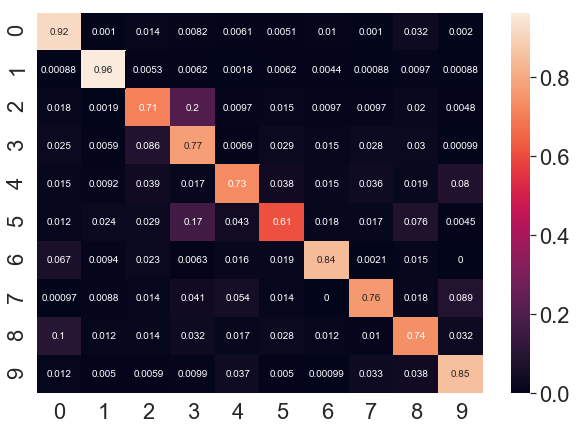

In [55]:
# KNN TEST
knn = KNeighborsClassifier()
knn.fit(X1, Y1)
predictions = knn.predict(X1_TEST)
print(accuracy_score(Y1_TEST, predictions))
#print(classification_report(Y_TEST, predictions))

conf = confusion_matrix(Y1_TEST, predictions)
conf = conf.astype('float')

for i in range(0, len(conf)):
    conf[i] = (conf[i] / conf[i].sum())

sn.set(font_scale=2)
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True, annot_kws={"size": 10})

0.6894


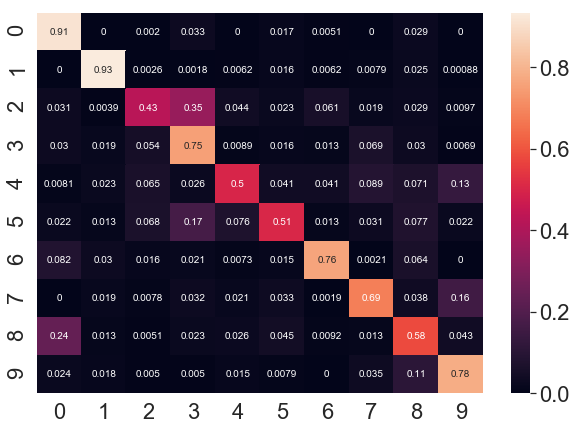

In [56]:
# LDA TEST
lda = LinearDiscriminantAnalysis()
lda.fit(X1, Y1)
predictions = lda.predict(X1_TEST)
print(accuracy_score(Y1_TEST, predictions))

conf = confusion_matrix(Y1_TEST, predictions)
conf = conf.astype('float')

for i in range(0, len(conf)):
    conf[i] = (conf[i] / conf[i].sum())

sn.set(font_scale=2)
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True,annot_kws={"size": 10})

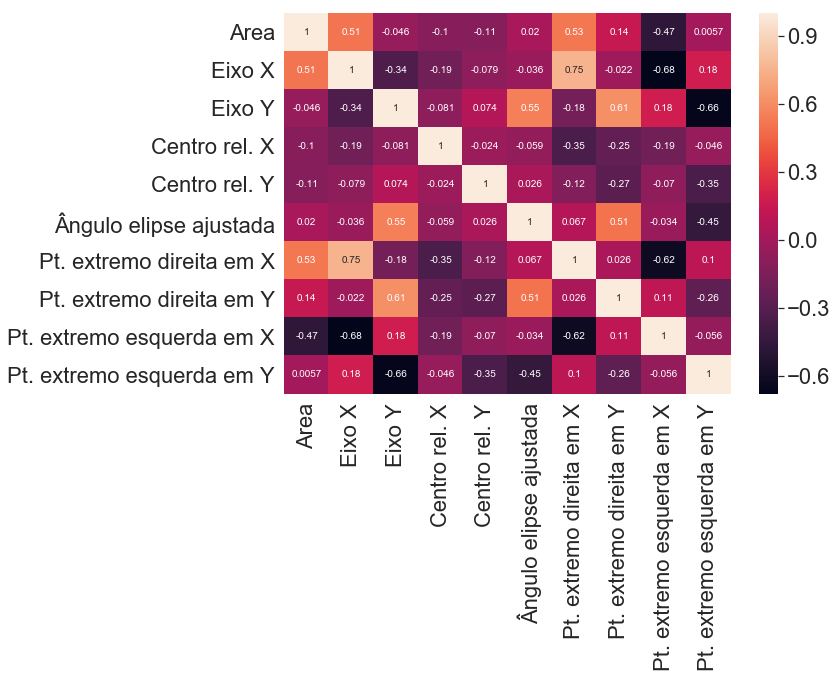

In [36]:
cov = np.corrcoef(X1, rowvar=False)
labels = ["Area", "Eixo X", "Eixo Y", "Centro rel. X", "Centro rel. Y", "Ângulo elipse ajustada", 
          "Pt. extremo direita em X", "Pt. extremo direita em Y", "Pt. extremo esquerda em X", "Pt. extremo esquerda em Y"]
sn.set(font_scale=2)
plt.figure(figsize = (10,7))
sn.heatmap(cov, annot=True,annot_kws={"size": 10}, xticklabels=labels, yticklabels=labels)



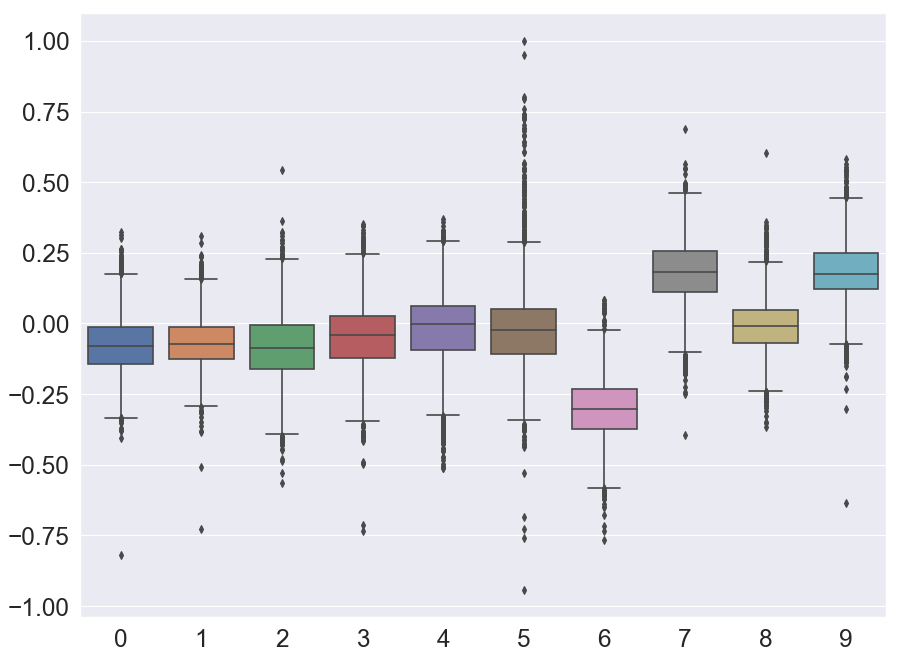

6.034833015316984e-24
